In [1]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score,
    recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Membaca dataset
df = pd.read_csv('ObesityDataSet.csv')

In [3]:
# Menampilkan data pertama 
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [5]:
df.shape

(2111, 17)

In [6]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
print(df.dtypes)

Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


# EDA

In [8]:
# Mengecek missing values
df.isnull().sum()

Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

In [9]:
# Mengcek Duplikat
df.duplicated().sum()

18

In [10]:
# Mengecek Nilai Unik
df.nunique()

Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64

In [11]:
# Konversi Kolom ke Numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

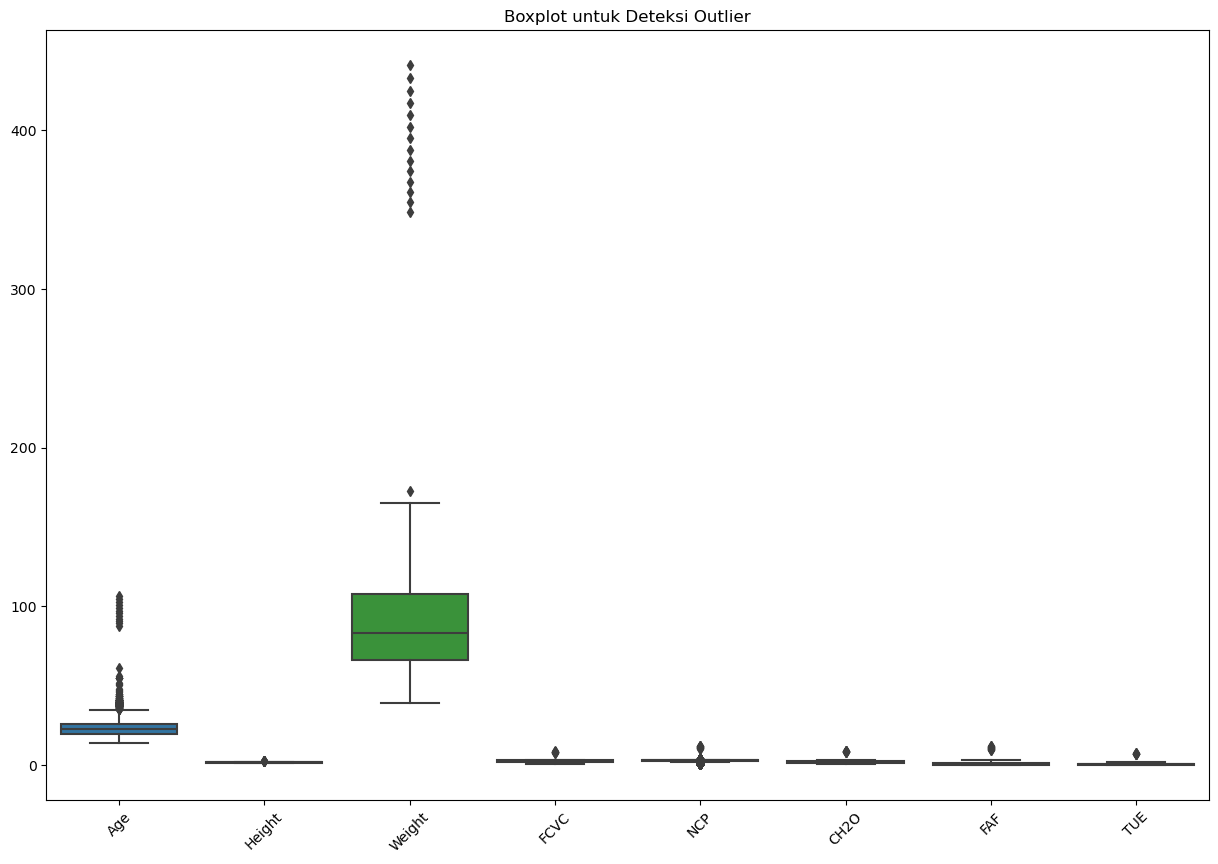

In [12]:
# Visualisasi Boxplot untuk Outlier
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

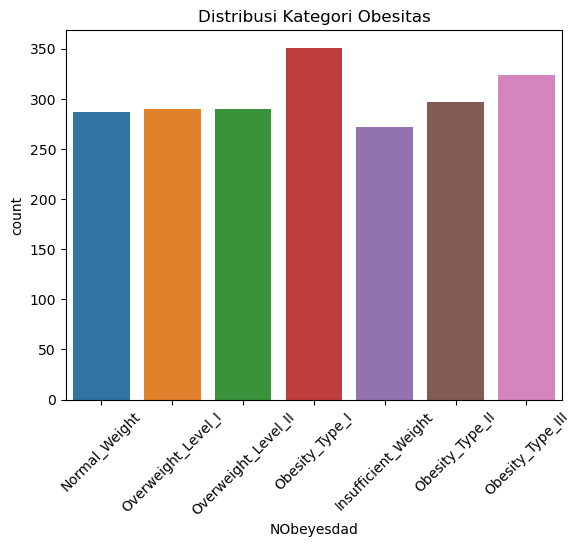

In [13]:
# Visualisasi Kelas Target
sns.countplot(x='NObeyesdad', data=df)
plt.xticks(rotation=45)
plt.title("Distribusi Kategori Obesitas")
plt.show()

# Prepocessing

In [14]:
# Menangani Missing Values & Tipe Data
df.replace(['?', ' ', 'NA', 'na', 'NaN'], np.nan, inplace=True)
df.drop_duplicates(inplace=True)

In [15]:
# Mengubah kolom numerik ke float
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [16]:
# Drop rows with missing values
df.dropna(inplace=True)

# Tangani Outlier (gunakan IQR method)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [17]:
# Mengubahbah Data Kategori Menjadi Numerik
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('NObeyesdad')  # ini target

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [18]:
# Encode label (target)
target_encoder = LabelEncoder()
df['NObeyesdad'] = target_encoder.fit_transform(df['NObeyesdad'])

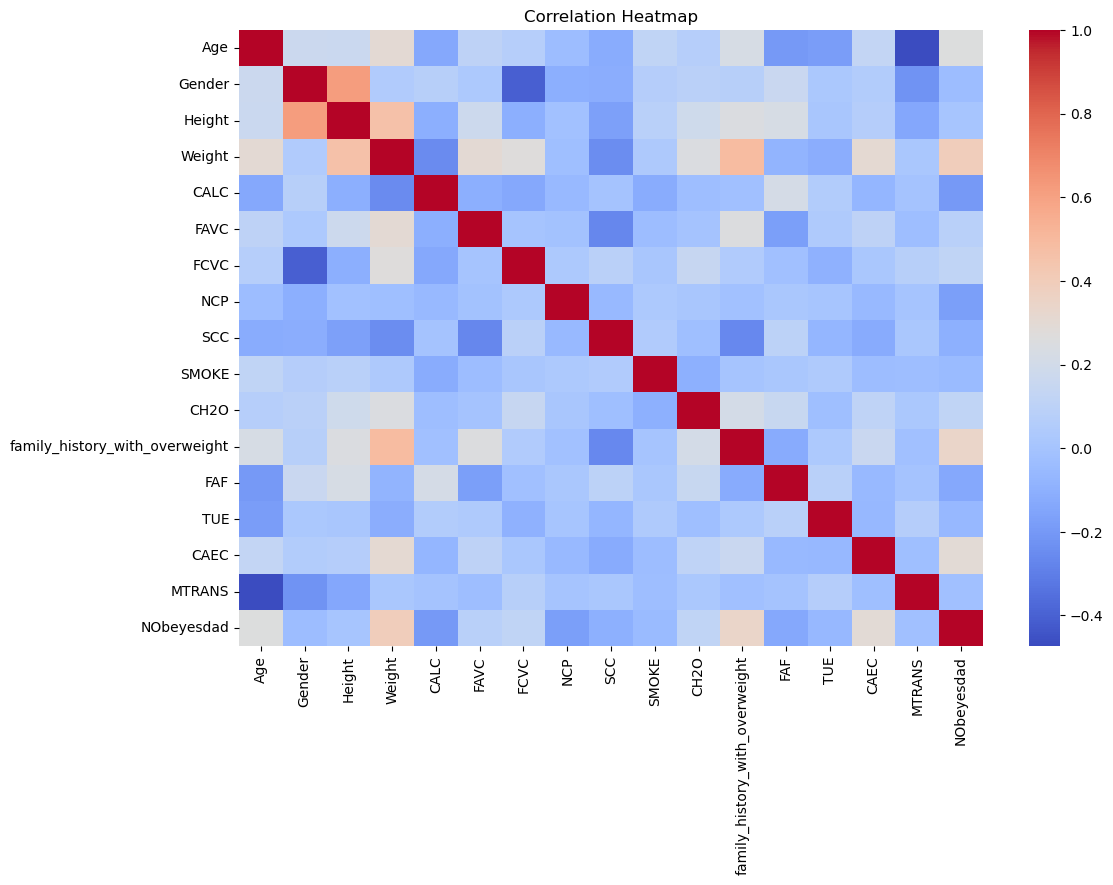

In [19]:
# Mengecek Korelasi dan Seleksi Fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# Seleksi fitur berdasarkan korelasi
X = df.drop(columns=['NObeyesdad'])  # fitur
y = df['NObeyesdad']  # target

In [21]:
# Mengatasi Ketidakseimbangan Kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)


In [22]:
# Normalisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

In [23]:
print("Jumlah sampel setelah SMOTE:", len(y_balanced))
print("Distribusi kelas:\n", pd.Series(y_balanced).value_counts())

Jumlah sampel setelah SMOTE: 1820
Distribusi kelas:
 NObeyesdad
1    260
5    260
2    260
6    260
3    260
0    260
4    260
Name: count, dtype: int64


In [24]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_balanced, test_size=0.2, random_state=42)

In [25]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = {}

In [26]:
# Train dan evaluasi model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1_score": f1_score(y_test, y_pred, average='weighted'),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "report": classification_report(y_test, y_pred, target_names=target_encoder.classes_)
    }

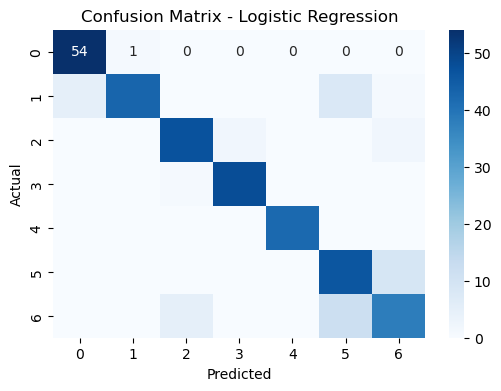

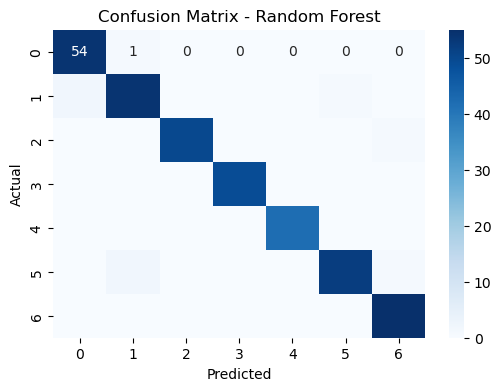

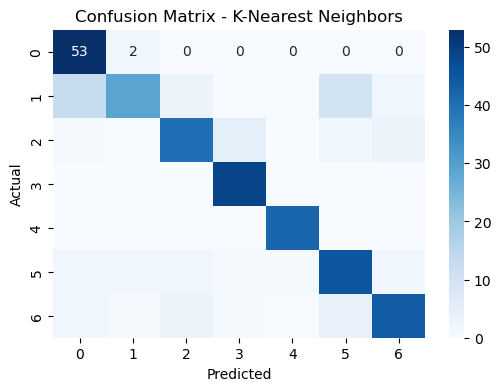

In [27]:
# Tampillan confusion matrix
for name in models:
    plt.figure(figsize=(6,4))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

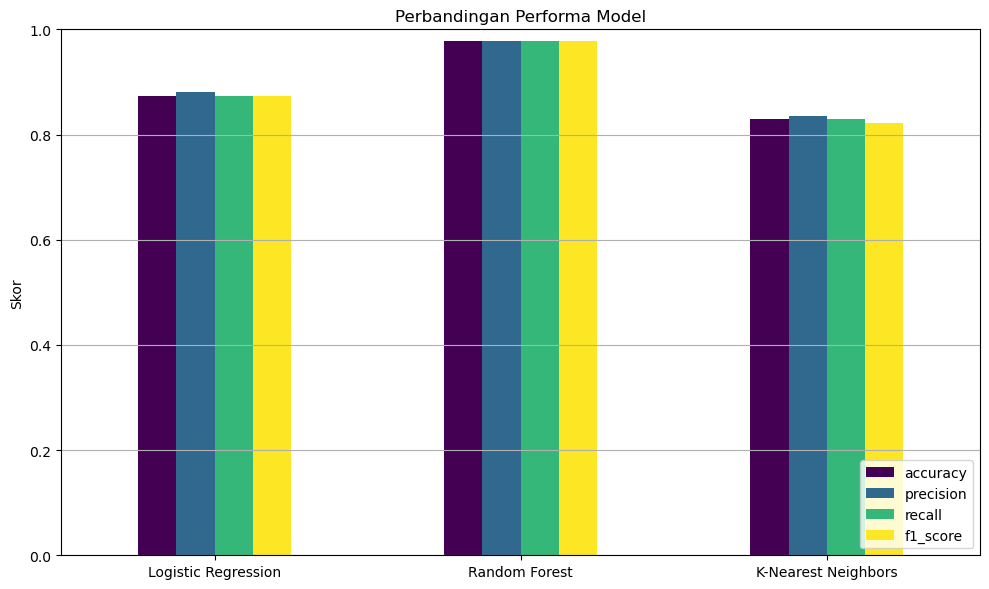

In [28]:
# Visualisasi perbandingan metrik
metrics_df = pd.DataFrame(results).T[['accuracy', 'precision', 'recall', 'f1_score']]
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Perbandingan Performa Model")
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [29]:
# Tampilan classification report
for name in results:
    print(f"===== {name} =====")
    print(results[name]['report'])

===== Logistic Regression =====
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.98      0.95        55
      Normal_Weight       0.98      0.75      0.85        57
     Obesity_Type_I       0.89      0.92      0.90        51
    Obesity_Type_II       0.96      0.98      0.97        49
   Obesity_Type_III       1.00      1.00      1.00        42
 Overweight_Level_I       0.70      0.84      0.76        55
Overweight_Level_II       0.76      0.69      0.72        55

           accuracy                           0.87       364
          macro avg       0.89      0.88      0.88       364
       weighted avg       0.88      0.87      0.87       364

===== Random Forest =====
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.98      0.97        55
      Normal_Weight       0.95      0.95      0.95        57
     Obesity_Type_I       1.00      0.98      0.99        51
    Obesity_Type_II    